# Imports

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow.keras.applications as apps

import contextlib
import concurrent.futures
import io

from utility.data_loader import load_image
from utility.wavelet_coder import HaarCoder
from utility.result_manager import load_summary_results, get_short_comparison
from utility.classifying_tools import classify_images_n_icons_from_folder, load_classifier

%matplotlib inline

# Models
Trained image classifiers: https://keras.io/api/applications/

In [2]:
classifiers = {
    'MobileNetV2': load_classifier(apps.mobilenet_v2.MobileNetV2),
    'VGG16': load_classifier(apps.vgg16.VGG16),
    'VGG19': load_classifier(apps.vgg19.VGG19),
    'ResNet50': load_classifier(apps.resnet50.ResNet50),
    'NASNetMobile': load_classifier(apps.nasnet.NASNetMobile),
    'NASNetLarge': load_classifier(apps.nasnet.NASNetLarge, shape=(331, 331))
}

# Data

In [3]:
path = 'data\orig'
list_dir = os.listdir(path)
print('Number of images:', len(list_dir))

Number of images: 130


Text(0.5, 1.0, 'pp_03.jpg, shape: (6350, 9588, 3)')

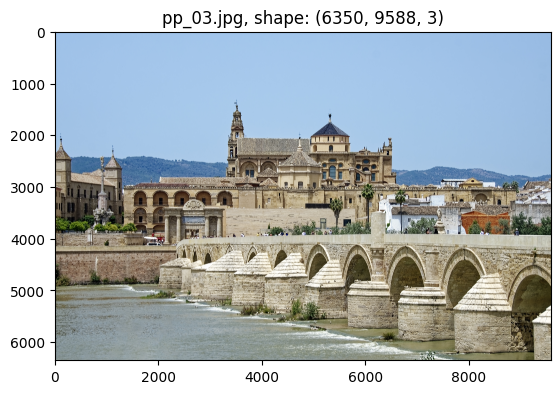

In [4]:
# Sample
index = 2

name = list_dir[index]
# sample = load_image(f'{drive_path}/{name}')
sample = load_image(f'{path}/{name}')

plt.imshow(sample)
plt.title(f'{name}, shape: {sample.shape}')

# Analysis
Let's look on classifying comparison with one certain depth

In [5]:
coder = HaarCoder()
depth = 5
top = 5

# type of interpolation used in resizing
interpolation = cv2.INTER_AREA

# Define the results folder
results_folder = os.path.join("results", f"depth_{depth}")
os.makedirs(results_folder, exist_ok=True)

In [6]:
def process_classifier(item):
    name, classifier = item
    res = classify_images_n_icons_from_folder(classifier, path, coder, depth, interpolation)
    res_df = get_short_comparison(res, top)

    # Save CSV files inside the "results" folder
    res_df.to_csv(os.path.join(results_folder, f"{name}-depth_{depth}.csv"))
    sum_df = res_df.describe()
    sum_df.to_csv(os.path.join(results_folder, f"{name}-summary-depth_{depth}.csv"))

    return name, sum_df

# with contextlib.redirect_stdout(io.StringIO()): #silencing output (wrong way)
with concurrent.futures.ThreadPoolExecutor() as executor: # processing multiple classifiers in parallel
    try:
        results = dict(executor.map(process_classifier,
                                    classifiers.items(),
                                    timeout=3600))  # 1 hour timeout
    except concurrent.futures.TimeoutError:
        print("Processing timed out")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

1/1 [==============================] - 0s 424ms/step


## For current depth

### MobileNetV2

In [7]:
load_summary_results(depth, 'MobileNetV2', True)


Summary for MobileNetV2 at depth 5:
Shape: (8, 4)
Columns: ['Unnamed: 0', 'similar classes (count)', 'similar classes (%)', 'similar best class']
First few rows:


,Unnamed: 0,similar classes (count),similar classes (%),similar best class
0,count,130.000000,130.000000,130.000000
1,mean,4.046154,80.923077,0.761538
2,std,0.745649,14.912986,0.427791
3,min,2.000000,40.000000,0.000000
4,25%,4.000000,80.000000,1.000000
5,50%,4.000000,80.000000,1.000000
6,75%,5.000000,100.000000,1.000000
7,max,5.000000,100.000000,1.000000


### VGG16

In [8]:
results['VGG16']

,similar classes (count),similar classes (%),similar best class
count,130.000000,130.000000,130.000000
mean,4.507692,90.153846,0.815385
std,0.649939,12.998784,0.389486
min,2.000000,40.000000,0.000000
25%,4.000000,80.000000,1.000000
50%,5.000000,100.000000,1.000000
75%,5.000000,100.000000,1.000000
max,5.000000,100.000000,1.000000


### VGG19

In [9]:
results['VGG19']

,similar classes (count),similar classes (%),similar best class
count,130.000000,130.000000,130.000000
mean,4.584615,91.692308,0.876923
std,0.581159,11.623183,0.329796
min,2.000000,40.000000,0.000000
25%,4.000000,80.000000,1.000000
50%,5.000000,100.000000,1.000000
75%,5.000000,100.000000,1.000000
max,5.000000,100.000000,1.000000


### ResNet50

In [10]:
results['ResNet50']

,similar classes (count),similar classes (%),similar best class
count,130.000000,130.000000,130.000000
mean,4.323077,86.461538,0.861538
std,0.706727,14.134544,0.346720
min,2.000000,40.000000,0.000000
25%,4.000000,80.000000,1.000000
50%,4.000000,80.000000,1.000000
75%,5.000000,100.000000,1.000000
max,5.000000,100.000000,1.000000


### NASNetMobile

In [11]:
results['NASNetMobile']

,similar classes (count),similar classes (%),similar best class
count,130.000000,130.000000,130.000000
mean,4.392308,87.846154,0.892308
std,0.687611,13.752216,0.311191
min,2.000000,40.000000,0.000000
25%,4.000000,80.000000,1.000000
50%,4.500000,90.000000,1.000000
75%,5.000000,100.000000,1.000000
max,5.000000,100.000000,1.000000


### NASNetLarge

In [12]:
results['NASNetLarge']

,similar classes (count),similar classes (%),similar best class
count,130.000000,130.000000,130.000000
mean,4.238462,84.769231,0.846154
std,0.814632,16.292643,0.362197
min,1.000000,20.000000,0.000000
25%,4.000000,80.000000,1.000000
50%,4.000000,80.000000,1.000000
75%,5.000000,100.000000,1.000000
max,5.000000,100.000000,1.000000


### Compare classifiers

In [11]:
names = []
mean_sim_clas_perc = []
mean_sim_best_clas = []

for name, df in results.items():
  names.append(name)
  mean_sim_clas_perc.append(df.iat[1, 1])
  mean_sim_best_clas.append(df.iat[1, 2] * 100)

### Similar classes

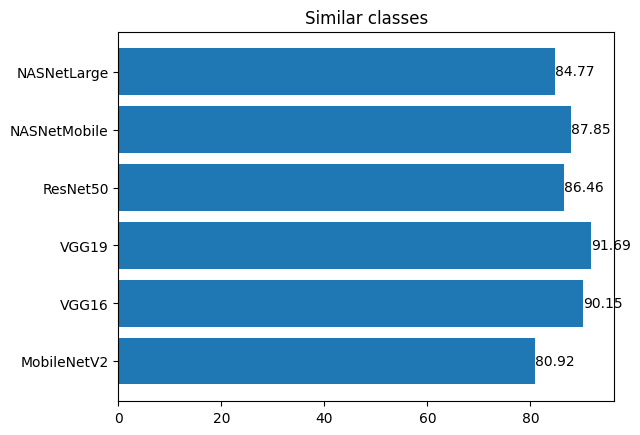

In [12]:
args = list(range(len(names)))

plt.barh(args, mean_sim_clas_perc)

for i, value in enumerate(mean_sim_clas_perc):
    plt.text(value + 0.01, i, f'{value:.2f}', va='center')

plt.yticks(args, labels=names)
plt.title('Similar classes')
plt.show()

### The best class similarity

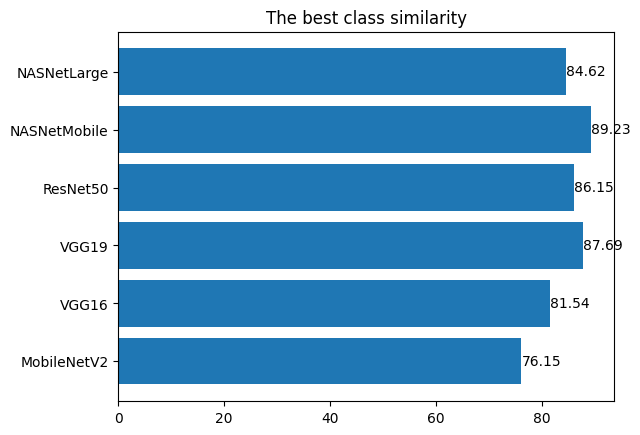

In [13]:
args = list(range(len(names)))

plt.barh(args, mean_sim_best_clas)

for i, value in enumerate(mean_sim_best_clas):
    plt.text(value + 0.01, i, f'{value:.2f}', va='center')

plt.yticks(args, labels=names)
plt.title('The best class similarity')
plt.show()

##  Results comparison for different depths

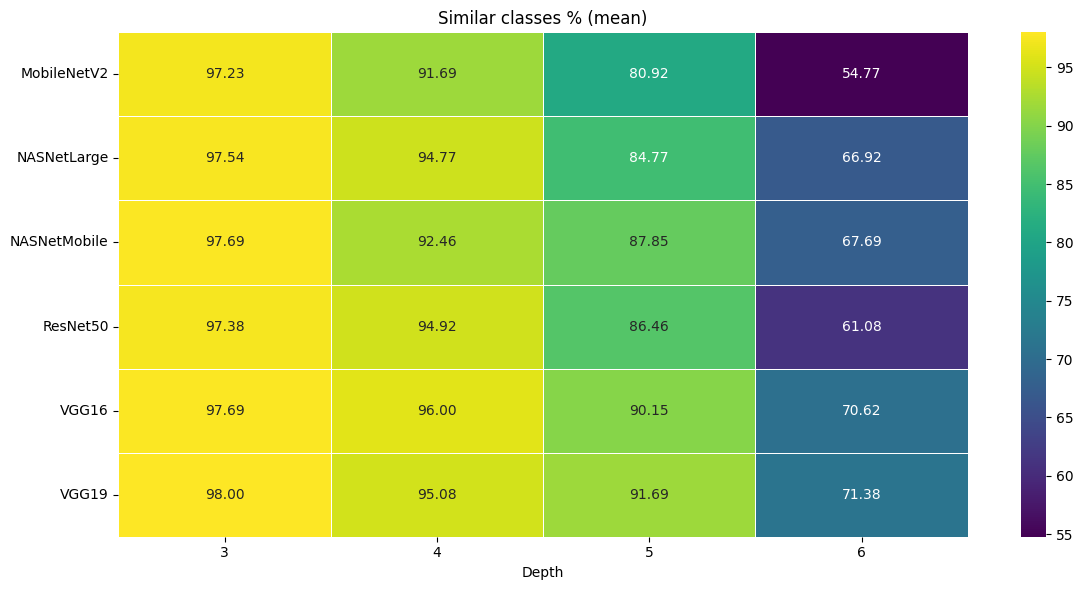

In [14]:
import utility.result_manager as rm
from settings.constants import SIM_CLASSES, SIM_CLASSES_PERC, SIM_BEST_CLASS

# classifiers = ['MobileNetV2', 'VGG16', 'VGG19', 'ResNet50', 'NASNetMobile', 'NASNetLarge']
depths = [3, 4, 5, 6]

x = rm.compare_summaries(classifiers, depths, "mean")
rm.visualize_comparison(x, SIM_CLASSES_PERC, title="Similar classes % (mean)")

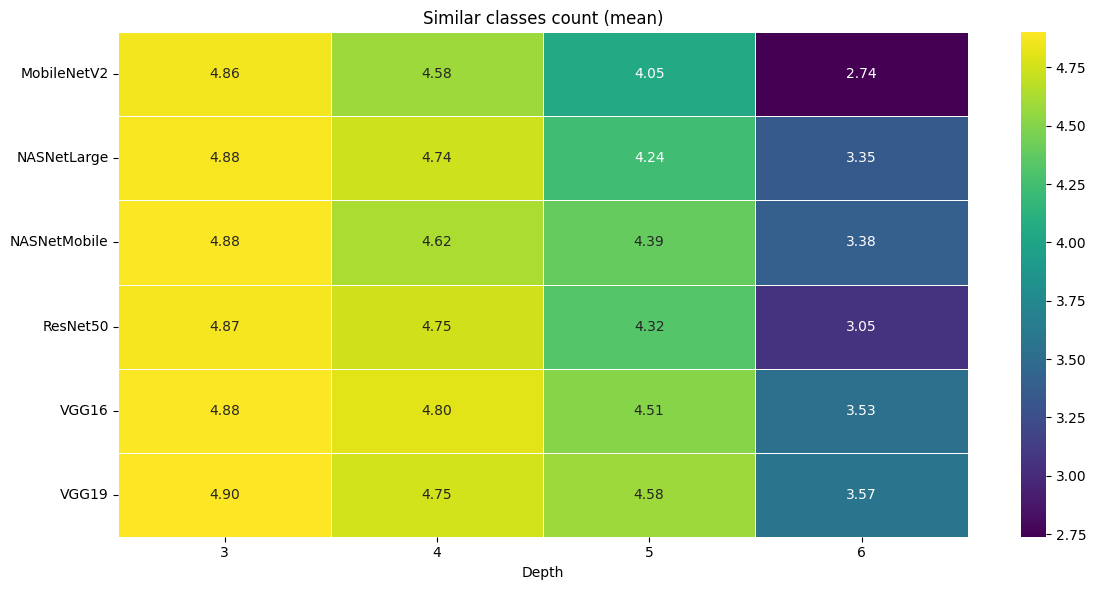

In [15]:
rm.visualize_comparison(x, SIM_CLASSES, title="Similar classes count (mean)")

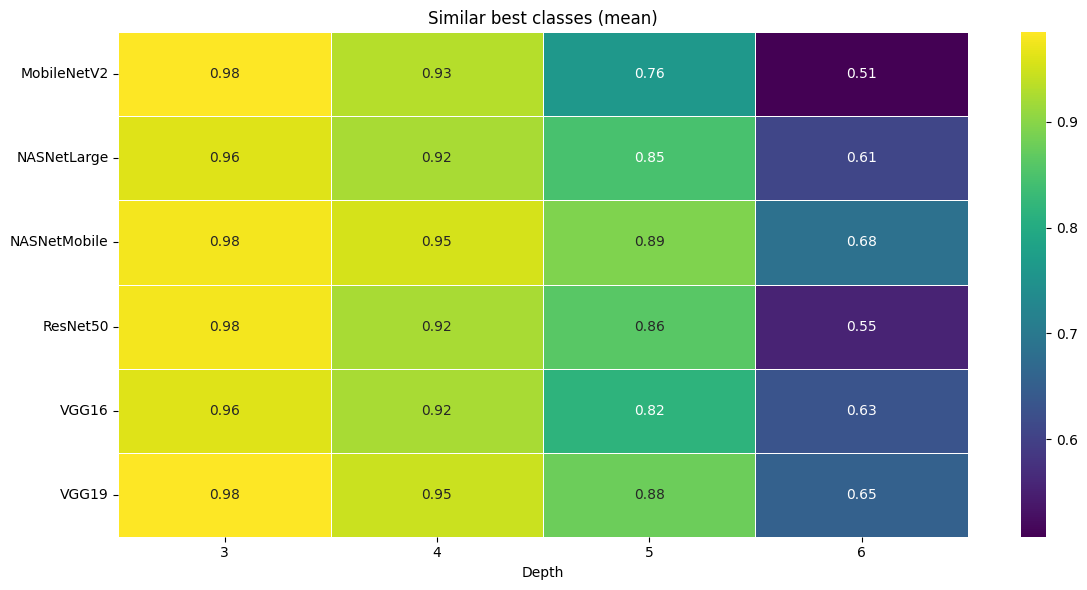

In [16]:
rm.visualize_comparison(x, SIM_BEST_CLASS, title="Similar best classes (mean)")

# Conclusions
_For depth 5_


On average, each model:

* Produces the same best prediction class for at least 80% of cases for both source and icon images.
* Provides predictions that coincide between the source and icon images in at least 80.88% of cases.

So, in some applications, when operating large digital photos, it makes sense to apply classifier to **icon**.

REMARK. In this demo, the Haar wavelet is used. Its approximation properties are not the best. In other words, there exists better wavelet systems, and these systems might produce better icon. So, the percentage might be higher. The framework and its extension can be useful in the research.